# K-Nearest Neighbor Classifier / K-Vecinos más Cercanos: KNN Classifier
## Datos de clientes bancarios: crédito

In [1]:
# Importaciones requeridas y lectura de la base de datos
import pandas as pd # manejo y análisis de datos
import numpy as np # generar datos
import matplotlib.pyplot as plt # graficar la información
from sklearn import preprocessing # para usar métodos de escalamiento de datos
from sklearn.neighbors import KNeighborsClassifier

# leer el archivo .csv donde estará la base de datos que usaremos
clients = pd.read_csv("./Assets/dataBaseElements200.csv")

print("**Base de datos de clientes del banco que sacaron un crédito")
print("------------------------------------------------------------")
clients


**Base de datos de clientes del banco que sacaron un crédito
------------------------------------------------------------


,Edad,Credito,Cumplio
0,60,100667,0
1,20,135319,1
2,45,462800,0
3,19,509836,0
4,59,262093,1
...,...,...,...
195,57,67337,1
196,48,347142,0
197,26,336357,1
198,40,522887,1


## Clientes Pagadores VS Clientes Deudores

In [2]:
# Filtrar a los clientes buenos (los que cumplieron pagando el crédito) y los clientes malos (los que NO cumplieron pagando el crédito)
goodCustomers = clients[clients["Cumplio"]==1]
badCustomers = clients[clients["Cumplio"]==0]

print("**Clientes que cumplieron y NO cumplieron pagando el crédito")
print("------------------------------------------------------------")
goodCustomers, badCustomers,

**Clientes que cumplieron y NO cumplieron pagando el crédito
------------------------------------------------------------


(     Edad  Credito  Cumplio
 1      20   135319        1
 4      59   262093        1
 6      30   565252        1
 7      39    72692        1
 8      22   366972        1
 ..    ...      ...      ...
 188    21   136102        1
 194    34   422720        1
 195    57    67337        1
 197    26   336357        1
 198    40   522887        1
 
 [99 rows x 3 columns],
      Edad  Credito  Cumplio
 0      60   100667        0
 2      45   462800        0
 3      19   509836        0
 5      56   491736        0
 9      48   555228        0
 ..    ...      ...      ...
 191    28   536269        0
 192    25    76501        0
 193    53   514235        0
 196    48   347142        0
 199    40    98794        0
 
 [101 rows x 3 columns])

## Gráfica de dispersión: Clientes Pagadores VS Clientes Deudores

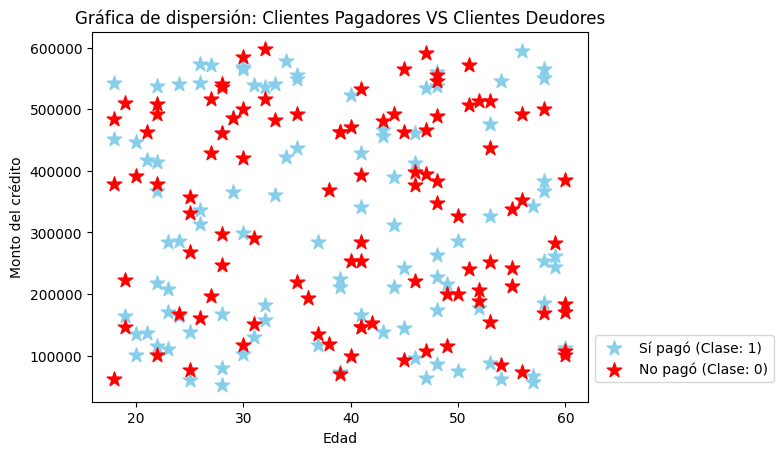

In [3]:
# Presentar los datos en una gráfica para ver intuitivamente cómo funciona un modelo KNN para poder, a partir de un nuevo solicitante, determinar si ese nuevo solicitante pagará o no pagará un crédito dado por el banco

# utilizando gráficas de dispersión para los clientes que SÍ pagaron el crédito
plt.scatter(goodCustomers["Edad"], goodCustomers["Credito"],
            marker="*", s=120, color="skyblue",
            label="Sí pagó (Clase: 1)")

# utilizando gráficas de dispersión para los clientes que NO pagaron el crédito
plt.scatter(badCustomers["Edad"], badCustomers["Credito"],
            marker="*", s=120, color="red", 
            label="No pagó (Clase: 0)")

plt.title("Gráfica de dispersión: Clientes Pagadores VS Clientes Deudores")
plt.ylabel("Monto del crédito")
plt.xlabel("Edad")
plt.legend(bbox_to_anchor=(1, 0.2)) 
plt.show()

## Preparación de los datos (Escalar en un rango de 0 y 1)

In [4]:
# Preparar los datos formateando a una escala (ya que puede ser que le den más o menos peso a las variables en función a los rangos que tiene cada una de ellas)

dataClients = clients[["Edad", "Credito"]] # separar datos que caracterizan a los clientes como la edad y el credito
classClient = clients["Cumplio"] # esta clase nos ayudará a guiar la creación de nuestro clasificador
# como se está trabajando con un modelo de aprendizaje de máquina supervisado, es decir, que usaremos el classClient para guiar la construcción de nuestro modelo

# el método de procesamiento es el MinMaxScaler() que hará que los números más pequeños los hace 0 y los más grandes los hace 1
scaler = preprocessing.MinMaxScaler()

# en función a las referencias anterior, hace un procesamiento para que todos nuestros datos estén escalados en el rango de 0 y 1 (el classClient no hace falta escalar porque ya está en el rango de 0 y 1)
dataScaled = scaler.fit_transform(dataClients.values)

print("**Mostrar los datos escalados")
print("-----------------------------")
dataScaled

**Mostrar los datos escalados
-----------------------------


array([[1.        , 0.08872444],
       [0.04761905, 0.15221394],
       [0.64285714, 0.75222567],
       [0.02380952, 0.83840518],
       [0.97619048, 0.38448967],
       [0.9047619 , 0.8052423 ],
       [0.28571429, 0.93993855],
       [0.5       , 0.03746855],
       [0.0952381 , 0.5766493 ],
       [0.71428571, 0.92157254],
       [0.69047619, 0.75915689],
       [0.95238095, 0.94120094],
       [0.19047619, 0.89760183],
       [0.33333333, 0.85217418],
       [0.21428571, 0.68885343],
       [0.28571429, 0.97541   ],
       [0.        , 0.89930211],
       [0.11904762, 0.21843526],
       [0.64285714, 0.93894549],
       [0.47619048, 0.12074036],
       [0.19047619, 0.47902219],
       [0.61904762, 0.61850415],
       [0.47619048, 0.58142036],
       [0.33333333, 1.        ],
       [0.66666667, 0.66141802],
       [0.92857143, 0.53252802],
       [0.28571429, 0.09305393],
       [0.14285714, 0.20959488],
       [0.11904762, 0.10594898],
       [0.26190476, 0.79582661],
       [0.

## Usando la librería KNeighborsClassifier de Python

In [5]:
# **Usando librearía KNeighborsClassifier
# Implementación del modelo KNN Classifier que nos indique, en función de los vecinos, si una persona pagará o no pagará el crédito dado por un banco. Esto es importante ya que el banco podrá ser capaz de ver si puede o no autorizar un crédito a un cliente dado
# Es recomendable tomar valores de K impares para evitar empates entre las clases 
classifier = KNeighborsClassifier(n_neighbors=3)

classifier.fit(dataScaled, classClient)


KNeighborsClassifier(n_neighbors=3)

## Analizando nuevo solicitante

Clase: [1]
Probabilidades por clase [[0. 1.]]


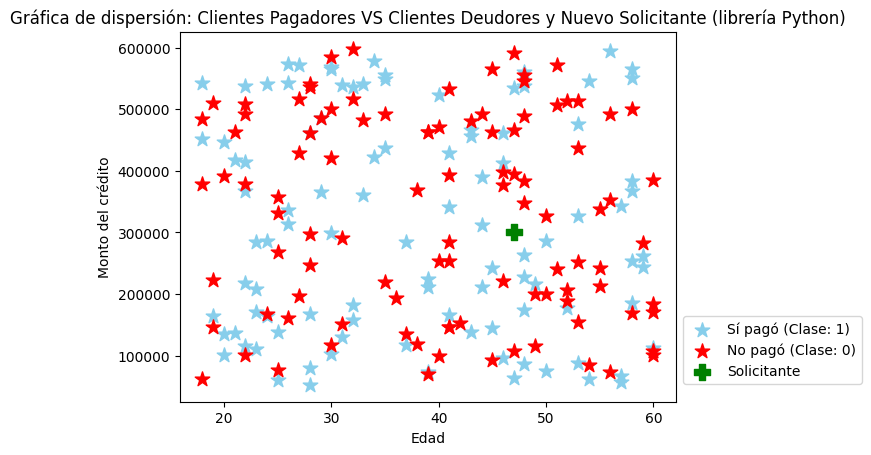

In [6]:
# Colocar el nuevo solicitante
ageApplicant = 47
creditApplicant = 300000

# Escalar los datos del nuevo solicitante
applicant = scaler.transform([[ageApplicant, creditApplicant]])

# Calcular clase y probabilidades
print("Clase:", classifier.predict(applicant))
print("Probabilidades por clase",
      classifier.predict_proba(applicant))

# utilizando gráficas de dispersión para los clientes que SÍ pagaron el crédito
plt.scatter(goodCustomers["Edad"], goodCustomers["Credito"],
            marker="*", s=120, color="skyblue", label="Sí pagó (Clase: 1)")

# utilizando gráficas de dispersión para los clientes que NO pagaron el crédito
plt.scatter(badCustomers["Edad"], badCustomers["Credito"],
            marker="*", s=120, color="red", label="No pagó (Clase: 0)")

# utilizando gráficas de dispersión para el nuevo solicitante del crédito
plt.scatter(ageApplicant, creditApplicant, marker="P", s=120, color="green", label="Solicitante") 

plt.title("Gráfica de dispersión: Clientes Pagadores VS Clientes Deudores y Nuevo Solicitante (librería Python)")
plt.ylabel("Monto del crédito")
plt.xlabel("Edad")
plt.legend(bbox_to_anchor=(1, 0.25))
plt.show()

## Generación de mapa de calor

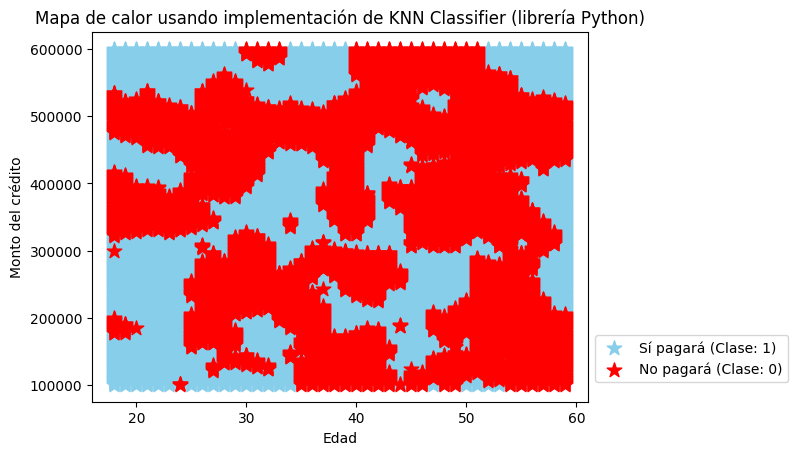

In [7]:
# Hacer un mapa de calor para las regiones de las clases
# Datos sinténticos de todos los posibles solicitantes

# Generación de valores de crédito y edades
credits = np.arange(100000, 600010, 1000)
ages = np.arange(18, 60)

# Creación de todas las combinaciones posibles de edades y créditos
age_combinations = np.repeat(ages, len(credits))
credit_combinations = np.tile(credits, len(ages))

# Creación del DataFrame (tendrá una fila para cada combinación única de edad y crédito)
dataBase = pd.DataFrame({"Edad": age_combinations, "Credito": credit_combinations})

# Escalar los datos
applicantHeatMap = scaler.transform(dataBase.values)

# Predecir todas las clases
resultingClasses = classifier.predict(applicantHeatMap)

# Código para graficar
goodCustomersHeatMap = dataBase[resultingClasses==1]
badCustomersHeatMap = dataBase[resultingClasses==0]

plt.scatter(goodCustomersHeatMap["Edad"], goodCustomersHeatMap["Credito"],
            marker="*", s=120, color="skyblue", label="Sí pagará (Clase: 1)")

plt.scatter(badCustomersHeatMap["Edad"], badCustomersHeatMap["Credito"],
            marker="*", s=120, color="red", label="No pagará (Clase: 0)")

plt.title("Mapa de calor usando implementación de KNN Classifier (librería Python)")
plt.ylabel("Monto del crédito")
plt.xlabel("Edad")
plt.legend(bbox_to_anchor=(1, 0.2))
plt.show()

## NO usando la librería KNeighborsClassifier de Python (forma manual)

In [8]:
# Implementación del modelo KNN Classifier que nos indique, en función de los vecinos, si una persona pagará o no pagará el crédito dado por un banco. Esto es importante ya que el banco podrá ser capaz de ver si puede o no autorizar un crédito a un cliente dado

# Calcular la distancia euclidiana entre dos puntos x1 y x2 utilizando la fórmula de la distancia euclidiana. La distancia euclidiana es una métrica comúnmente utilizada para medir la distancia entre dos puntos en un espacio multidimensional
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

# Realizar la predicción utilizando el algoritmo KNN manualmente:
  # 1. Calcula las distancias entre el nuevo dato x_new y todos los puntos en el conjunto de entrenamiento X_train.
  # 2. Ordena las distancias y toma los índices de los k puntos más cercanos (almacenados en k_indices).
  # 3. Obtiene las etiquetas correspondientes a los k puntos más cercanos del conjunto de entrenamiento y_train.
  # 4. Utiliza np.bincount para contar cuántas veces aparece cada etiqueta en k_nearest_labels y luego elige la etiqueta más común (la que tiene mayor frecuencia) como predicción.
def knn_predict(X_train, y_train, x_new, k):
    # Calcular las distancias entre el punto nuevo y todos los puntos en X_train
    distances = [euclidean_distance(x_new, x) for x in X_train]
    # Obtener los índices de los k vecinos más cercanos
    k_indices = np.argsort(distances)[:k]
     # Obtener las etiquetas de clase de los k vecinos más cercanos
    k_nearest_labels = [y_train[i] for i in k_indices]
    # Encontrar la clase más común entre los vecinos cercanos
    most_common = np.bincount(k_nearest_labels).argmax()
    
    return most_common


## Analizando nuevo solicitante

Clase: [1]
Probabilidades por clase: [0.505 0.495]


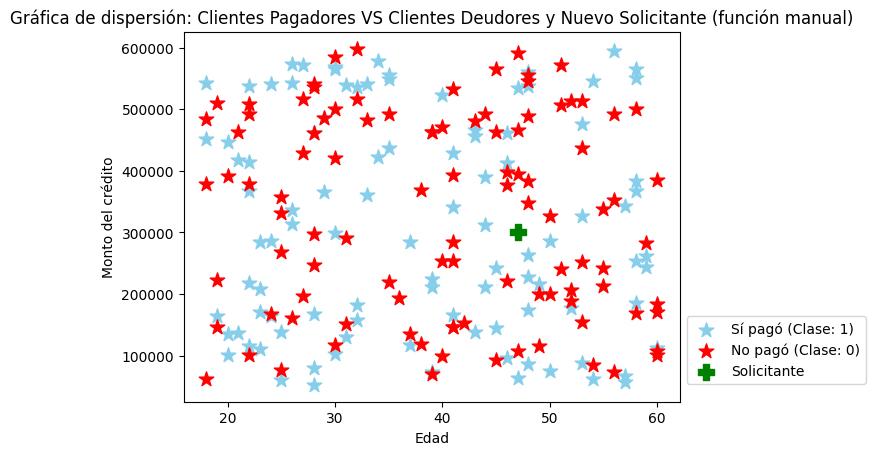

In [9]:
# Colocar el nuevo solicitante
ageApplicant = 47
creditApplicant = 300000

# Escalar los datos
applicant = np.array([[ageApplicant, creditApplicant]])
applicant_scaled = scaler.transform(applicant)

# Realizar predicción y calcular probabilidades
k = 3
predictions = []

# Se itera a través de cada dato escalado del nuevo solicitante (en este caso, solo hay uno) y se obtiene una predicción de clase para cada uno. Luego, se calculan las probabilidades basadas en la frecuencia de las clases en el conjunto de entrenamiento
for x_new in applicant_scaled:
    prediction = knn_predict(dataScaled, classClient, x_new, k)
    predictions.append(prediction)

probabilities = np.bincount(classClient).astype(float) / len(classClient)

print("Clase:", [predictions[0]])
print("Probabilidades por clase:", probabilities)

# utilizando gráficas de dispersión para los clientes que SÍ pagaron el crédito
plt.scatter(goodCustomers["Edad"], goodCustomers["Credito"],
            marker="*", s=120, color="skyblue", label="Sí pagó (Clase: 1)")

# utilizando gráficas de dispersión para los clientes que NO pagaron el crédito
plt.scatter(badCustomers["Edad"], badCustomers["Credito"],
            marker="*", s=120, color="red", label="No pagó (Clase: 0)")

# utilizando gráficas de dispersión para el nuevo solicitante del crédito
plt.scatter(ageApplicant, creditApplicant, marker="P", s=120, color="green", label="Solicitante") 

plt.title("Gráfica de dispersión: Clientes Pagadores VS Clientes Deudores y Nuevo Solicitante (función manual)")
plt.ylabel("Monto del crédito")
plt.xlabel("Edad")
plt.legend(bbox_to_anchor=(1, 0.25))
plt.show()



## Generación de mapa de calor

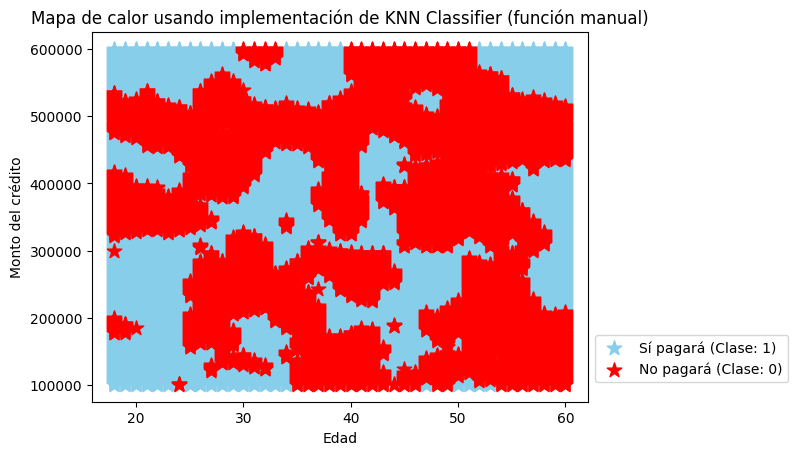

In [10]:
# Datos sintéticos de todos los posibles solicitantes
# Generación de valores de crédito y edades
credits = np.arange(100000, 600010, 1000).reshape(-1, 1)
ages = np.arange(18, 61).reshape(-1, 1)
# Crear una cuadrícula de todas las combinaciones posibles de edades y montos de crédito
age_grid, credit_grid = np.meshgrid(ages, credits)

# Apilar verticalmente las matrices de edad y crédito y obtener el dataframe
dataBase = pd.DataFrame(np.vstack((age_grid.ravel(), credit_grid.ravel())).T, columns=["Edad", "Credito"])

# Escalar los datos
applicantHeatMap = scaler.transform(dataBase.values)

# Predecir todas las clases
resultingClasses = np.array([knn_predict(dataScaled, classClient, x_new, k) for x_new in applicantHeatMap])

# Código para graficar
goodCustomersHeatMap = dataBase[resultingClasses == 1]
badCustomersHeatMap = dataBase[resultingClasses == 0]

plt.scatter(goodCustomersHeatMap["Edad"], goodCustomersHeatMap["Credito"],
            marker="*", s=120, color="skyblue", label="Sí pagará (Clase: 1)")

plt.scatter(badCustomersHeatMap["Edad"], badCustomersHeatMap["Credito"],
            marker="*", s=120, color="red", label="No pagará (Clase: 0)")

plt.title("Mapa de calor usando implementación de KNN Classifier (función manual)")
plt.ylabel("Monto del crédito")
plt.xlabel("Edad")
plt.legend(bbox_to_anchor=(1, 0.2))
plt.show()


## Conclusiones

1. **K-Nearest Neighbors (KNN) como algoritmo de clasificación:** El código implementa el algoritmo K-Nearest Neighbors (KNN) para la clasificación. KNN es un algoritmo simple pero efectivo que se basa en encontrar los vecinos más cercanos a un nuevo punto para predecir su clase. En este caso, se utilizó la distancia euclidiana como métrica de distancia.

2. **Preparación y procesamiento de datos:** Los datos se leen de un archivo CSV y se filtran para separar a los clientes que cumplieron y no cumplieron con el pago del crédito. Las características relevantes (edad y monto del crédito) se seleccionan y se escalan para que todas las características tengan el mismo peso.

3. **Predicción para un nuevo solicitante:** El código ilustra cómo predecir si un nuevo solicitante pagará o no pagará un crédito utilizando el modelo KNN entrenado previamente. El nuevo solicitante es escalado de la misma manera que los datos de entrenamiento y luego se realiza una predicción basada en los vecinos más cercanos.

4. **Visualización y análisis:** Aunque no se proporcionó la parte visual en el código, se menciona la importancia de representar los resultados mediante gráficas de dispersión y mapas de calor. Esto permitiría ver intuitivamente cómo el nuevo solicitante se clasifica en comparación con los datos existentes.

5. **Consideración del valor de K:** El valor de k (número de vecinos más cercanos) se establece en 3 en el código. Elegir un valor óptimo para k es una decisión importante y puede afectar la precisión del modelo.